### A Quick Guide to Setting Up Mase in Google Colab

1. Ensure that your Colab notebook is configured to use a GPU as an accelerator. To do this, navigate to Edit > Notebook settings or Runtime > Change runtime type and select GPU as the Hardware accelerator.

2. Generate a personal access token from your GitHub account and use it to clone the Mase repository.

3. Install all the required packages as specified in the "requirements.txt" file.

4. At this stage, you should be ready to run Mase! To confirm, execute the training Jupyter notebook code sample below. From the output, you should observe:

`GPU available: True (cuda), used: True, TPU available: False, using: 0 TPU cores, IPU available: False, using: 0 IPUs, HPU available: False, using: 0 HPUs,`

indicating that the GPU is actively utilized during training.

In [ ]:
# Check the current python version (It should be using Python 3.10) and update pip to the latest version.
!python --version
!python -m pip install --user --upgrade pip

Generate a personal access token and replace YOUR PERSONAL ACCESS TOKEN with your token
1. Visit GitHub website and login to your account.
2. Go to Settings, navigate to "<> Developer settings" and then click on Personal access tokens.
3. Click on Generate new token button on top right corner of the page.
4. Click the repo checkbox under Select scopes.

In [ ]:
git_token = "YOUR PERSONAL ACCESS TOKEN"
short_code = "YOUR SHORTCODE"

Clone the repository:

In [ ]:
!git clone https://{git_token}@github.com/DeepWok/mase.git

Create your own branch:

In [ ]:
%%bash
# Check if the branch exists. Branch exists, so checkout to that branch otherwise create a new one.
cd mase
if git show-ref --quiet --verify "refs/heads/lab1_${short_code}"; then
    # Branch exists, so checkout to that branch
    git checkout lab1_${short_code}
else
    # Branch doesn't exist, so create it
    git branch lab1_${short_code}
    git checkout lab1_${short_code}
fi

Install the required packages:

In [ ]:
!python -m pip install -r ./mase/machop/requirements.txt

In [ ]:
# Change working directory to machop
%cd ./mase/machop/

At this stage, you are ready to run Mase! To confirm, execute `./ch` using with the `--help` option which will print out a usage guide

In [ ]:
!./ch --help

### Using Colab as Virtual Machine

Throughout the exercises you will use Google Colab extensively as a virtual machine. There are several ways to interact with the virtual machine through a command-line-like interface.

1. `!` Commands

    You can run a standard shell command in a cell by simply appending `!` to the beginning of the command. This effectively launches a new shell and runs the specified command within it.

    `!ls`

2. Magic (`%`) Commands

    Certain 'Magic Commands' are provided by the IPython kernel.
    
    The main difference between magic and `!` commands are that `!` commands do not affect the current 'state' of the notebook runtime.

    For example, to change the current directory, use a magic command:

    `%cd foo`

    rather than a `!` command.

    (`!cd foo` only changes the directory in the shell that it launches and not the notebook runtime)

3. Bash Cell

    To convert an entire cell to run shell commands, add `%%bash` to the beginning of the cell. This is useful if you need to run multiple shell commands together. Note each command will be executed as a `!` rather than a magic command.

# Training your first network

In this section, we are interested in training a small network and evaluate the trained network through the command line flow.


The dataset we look at is the Jet Substructure Classification (JSC) dataset.

> [A bit of physics]
Jets are collimated showers of particles that result from the decay and hadronization of quarks q and gluons g.
At the Large Hadron Collider (LHC), due to the high collision energy, a particularly interesting jet signature emerges from overlapping quark-initiated showers produced in decays of heavy standard model particles.
It is the task of jet substructure to distinguish the various radiation profiles of these jets from backgrounds consisting mainly of quark (u, d, c, s, b) and gluon-initiated jets. The tools of jet substructure have been used to distinguish interesting jet signatures from backgrounds that have production rates hundreds of times larger than the signal.

In short, the dataset contains inputs with a feature size of 16 and 5 output classes.

## The train command

To train a network for the JSC dataset, you would need to run:

```bash
# You will need to run this command
./ch train jsc-tiny jsc --max-epochs 10 --batch-size 256
```

`--max-epochs` states the maximum epochs allowed to train, and `--batch-size` defines the batch size for training.

You should see a print out of the training configuration in a table

```bash
+-------------------------+--------------------------+-----------------+--------------------------+
| Name                    |         Default          | Manual Override |        Effective         |
+-------------------------+--------------------------+-----------------+--------------------------+
| task                    |      classification      |                 |      classification      |
| load_name               |           None           |                 |           None           |
| load_type               |            mz            |                 |            mz            |
| batch_size              |           128            |       256       |           256            |
| to_debug                |          False           |                 |          False           |
| log_level               |           info           |                 |           info           |
| seed                    |            0             |                 |            0             |
| training_optimizer      |           adam           |                 |           adam           |
| trainer_precision       |            32            |                 |            32            |
| learning_rate           |          1e-05           |                 |          1e-05           |
| weight_decay            |            0             |                 |            0             |
| max_epochs              |            20            |       10        |            10            |
| max_steps               |            -1            |                 |            -1            |
| accumulate_grad_batches |            1             |                 |            1             |
| log_every_n_steps       |            50            |                 |            50            |
| num_workers             |            16            |        0        |            0             |
| num_devices             |            1             |                 |            1             |
| num_nodes               |            1             |                 |            1             |
| accelerator             |           auto           |                 |           auto           |
| strategy                |           ddp            |                 |           ddp            |
| is_to_auto_requeue      |          False           |                 |          False           |
| github_ci               |          False           |                 |          False           |
| disable_dataset_cache   |          False           |                 |          False           |
| target                  |   xcu250-figd2104-2L-e   |                 |   xcu250-figd2104-2L-e   |
| num_targets             |           100            |                 |           100            |
| is_pretrained           |          False           |                 |          False           |
| max_token_len           |           512            |                 |           512            |
| project_dir             | /Users/aaron/Projects/ma |                 | /Users/aaron/Projects/ma |
|                         |   se-tools/mase_output   |                 |   se-tools/mase_output   |
| project                 |           None           |                 |           None           |
| model                   |           None           |    jsc-tiny     |         jsc-tiny         |
| dataset                 |           None           |       jsc       |           jsc            |
+-------------------------+--------------------------+-----------------+--------------------------+
```

There is also a summary on the model

```bash
  | Name      | Type               | Params
-------------------------------------------------
0 | model     | JSC_Tiny           | 127
1 | loss_fn   | CrossEntropyLoss   | 0
2 | acc_train | MulticlassAccuracy | 0
3 | acc_val   | MulticlassAccuracy | 0
4 | acc_test  | MulticlassAccuracy | 0
5 | loss_val  | MeanMetric         | 0
6 | loss_test | MeanMetric         | 0
-------------------------------------------------
127       Trainable params
0         Non-trainable params
127       Total params
0.001     Total estimated model params size (MB)
```

In [ ]:
# Train a model!
!./ch train jsc-tiny jsc --max-epochs 1 --batch-size 256

### Retrieve the checkpoint and training log to your local device (important!)

A checkpoint serves as an interim snapshot of a model's complete internal state, encompassing its weights, current learning rate, and more. This enables the framework to resume training from this specific point whenever necessary.

MASE produces an output directory after running the training flow. The output directory is found at `./mase_output/<model>_<task>_<dataset>_<current_date>`.
This directory includes
* `hardware` - a directory for Verilog hardware generated for the trained model
* `software` - a directory for any software generated for the trained model, including checkpoints, MASE models as well as any generated logs.

Google Colab does not persist any files generated between different sessions. To save any output generated by MASE, it is recommended to save the output to a folder on your Google Drive.

First, 'mount' your Google Drive to the current runtime. This adds your Google Drive to the runtime's file system and allows you to read/write to it programmatically.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Then, copy your output to a directory on your Google Drive. (Ensure you are copying the correct path!)

In [ ]:
%%bash
mkdir -p /content/drive/MyDrive/mase_output
cp -r /content/mase/mase_output/jsc-tiny_classification_jsc_2024-01-08 /content/drive/MyDrive/mase_output

### Logging on tensorboard (Colab)

For any training commands executed, a logging directory would be created and one can use [tensorboard](https://www.tensorflow.org/tensorboard) to check the training trajectory.

On Colab, load the tensorboard extension into the notebook:

In [ ]:
%load_ext tensorboard

Then, run tensorboard on the logs that were just generated.

In [ ]:
# Check if the file name and date is correct!
%tensorboard --logdir /content/mase/mase_output/jsc-tiny_classification_jsc_2023-01-08/software/tensorboard/lightning_logs/version_0

### The test command

Under the same folder ../mase_output/jsc-tiny_classification_jsc_2023-11-12/software, there are also saved checkpoint files for the trained models. These are basically the trained parameters of the model, one can find more detail on Pytorch model checkpointing here and Lightning checkpointing here.

>  **Note:** You have the flexibility to test any previously saved checkpoint from your local machine by uploading it back to the sidebar under /mase_output.

In [ ]:
# Check if the file name and date is correct!
!./ch test jsc-tiny jsc --load ../mase_output/jsc-tiny_classification_jsc_2023-01-08/software/training_ckpts/best.ckpt --load-type pl

The above command would return you the performance of the trained model on the test set. --load-type pl tells Machop that the checkpoint is saved by PyTorch Lightning. For PyTorch Lightning, see this [section](https://github.com/JianyiCheng/mase-tools/blob/coursework-prep/docs/labs/lab1.md#the-entry-point-for-the-train-action). The saved checkpoint can also be used to resume training.

## The definition of the JSC dataset

Datasets are defined in under the [dataset](../../machop/chop/dataset) folder in `chop`, one should take a look at the [\_\_init__.py](../../machop/chop/dataset/__init__.py) to understand how different datasets are declared. The JSC dataset is defined and detailed in [this file](../../machop/chop/dataset/physical/jsc.py#L142):

```python
@add_dataset_info(
    name="jsc",
    dataset_source="manual",
    available_splits=("train", "validation", "test"),
    physical_data_point_classification=True,
    num_classes=5,
    num_features=16,
)
class JetSubstructureDataset(Dataset):
    def __init__(self, input_file, config_file, split="train"):
        super().__init__()
  ...
```

The [decorator](https://book.pythontips.com/en/latest/decorators.html) (if you do not know what is a python decorator, click the link and learn) defines the dataset information required. The class object `JetSubstructureDataset` has `Dataset` being its parent class. If you are still concerned with your proficiency in OOP (object orientated programming), you should check this [link](https://book.pythontips.com/en/latest/classes.html).

## The definition of the JSC Tiny network

The network definition can also be found in the [\_\_init__.py](../../machop/chop/models/physical/jet_substructure/__init__.py#32)

```python
class JSC_Tiny(nn.Module):
    def __init__(self, info):
        super(JSC_Tiny, self).__init__()
        self.seq_blocks = nn.Sequential(
            # 1st LogicNets Layer
            nn.BatchNorm1d(16),  #  batch norm layer
            nn.Linear(16, 5),  # linear layer
        )

    def forward(self, x):
        return self.seq_blocks(x)
```

Network definitions in Pytorch normally contains two components: an `__init__` method and a `forward` method. Also all networks and custom layers in Pytorch has to be a subclass of  `nn.Module`.
The neural network layers are initialised in `__init__`. Every `nn.Module` subclass implements the operations on input data in the `forward` method.

`nn.Sequential` is a container used for wrapping a number of layers together, more information on this container can be found in this [link](https://pytorch.org/docs/stable/generated/torch.nn.Sequential.html).


# Varying the parameters

We have executed the following training command above:

````bash
./ch train jsc-tiny jsc --max-epochs 10 --batch-size 256
````

We can, apparently, tune a bunch of parameters, and the obvious ones to tune are

* `batch-size`
* `max-epochs`
* `learning-rate`

Tune these parameters by hand and answer the following questions:

1. What is the impact of varying batch sizes and why?
2. What is the impact of varying maximum epoch number?
3. What is happening with a large learning rate and what is happening with a small learning rate and why? What is the relationship between learning rates and batch sizes?

In [ ]:
"""What is the impact of varying batch sizes and why?"""

In [ ]:
"""What is the impact of varying maximum epoch number?"""

In [ ]:
"""What is happening with a large learning and what is happening with a small learning rate and why?
What is the relationship between learning rates and batch sizes?"""

# A deeper dive into the framework

When you execute `./ch`, what really happens is the [ch](../../machop/ch) file got executed and from the `import` you can tell it is calling into [cli.py](../../machop/chop/cli.py).


## The entry point for the train/teset action

When you choose to execute `./ch train`, we are executing the train action, and invoking [train.py](../../machop/chop/actions/train.py). The entire training flow is orchestrated using [PyTorch Lightning](https://lightning.ai/), so that the detailed lightning related wrapping occurs in [jet_substructure.py](../../machop/chop/plt_wrapper/physical/jet_substructure.py). PyTorch Lightning's checkpointing callbacks saves the model parameters (`torch.nn.Module.state_dict()`), the optimizer states, and other hyper-parameters specified in `lightning.pl.LightningModule`, so that the training can be resumed from the last checkpoint. The saved checkpoint has extension `.ckpt`, this is why we have `--load-type pl` in the `./ch test` command.

Test action has similar implementation based on PyTorch Lightning ([test.py](../../machop/chop/actions/test.py))


## The entry point for the model

All models are defined in the [\_\_init__.py](../../machop/chop/models/__init__.py) under the model folder. The `get_model` function is called inside `actions` (such as `train`) to ping down different models.

## The entry point for the dataset

Similar to the model definitions, all datasets are defined in the [\_\_init__.py](../../machop/chop/dataset/__init__.py) under the dataset folder.


# Train your own network

Now you are familiar with different components in the tool.

4. Implement a network that has in total around 10x more parameters than the toy network.
5. Test your implementation and evaluate its performance.

In [ ]:
"""
Implement a network that has in total around 10x more parameters than the toy network.
Test your implementation and evaluate its performance.
"""
# Example parameters:
# dataset = "jsc"
# model = "jsc-tiny"
# epochs = 10
# batch_size = 256

!./ch train <data_set> <model> --max-epochs <epochs> --batch-size <batch_size>

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [17]:
d = {
    'experiment': ['epochs_10_batch_128_lr_1e-3', 'epochs_20_batch_128_lr_1e-4', 'epochs_20_batch_128_lr_1e-3'], 
    'Medium': [0.6980928182601929, 0.7274804711341858, 0.7230419516563416],
    'Tiny': [0.6499, 0.5907, 0.4159]
}

df = pd.DataFrame(data=d)
df

,experiment,Medium,Tiny
0,epochs_10_batch_128_lr_1e-3,0.698093,0.6499
1,epochs_20_batch_128_lr_1e-4,0.727480,0.5907
2,epochs_20_batch_128_lr_1e-3,0.723042,0.4159


Text(0.5, 1.0, 'Validation Accuracy for Max and Average Pooling')

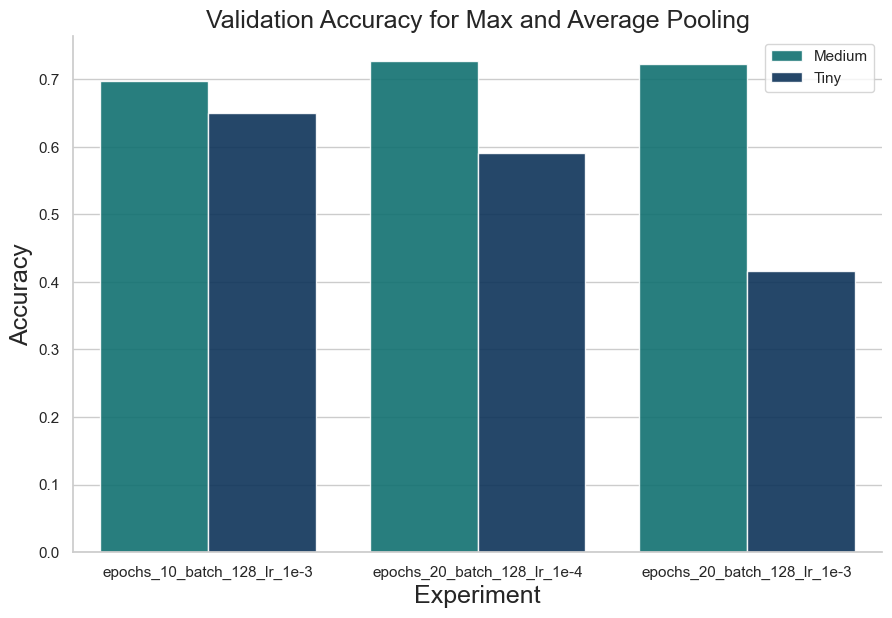

In [18]:
sns.set_theme(style="whitegrid")

melted_df = pd.melt(df, id_vars=['experiment'], value_vars=['Medium', 'Tiny'])

custom_palette = {"Medium": "#008080", "Tiny": "#003366"}

g = sns.catplot(
    x='experiment', y='value', hue='variable', data=melted_df,
    kind='bar', height=6, aspect=1.5, alpha=0.9, palette=custom_palette, legend_out=False
)

g._legend.set_title(title=None)

new_labels = ['Medium', 'Tiny']
for t, l in zip(g._legend.texts, new_labels):
    t.set_text(l)
    
plt.xlabel('Experiment', fontsize=18)
plt.ylabel('Accuracy', fontsize=18)
plt.title('Test Accuracy for Mediu and Tiny Networks', fontsize=18)

# plt.subplots_adjust(top=0.9)
# plt.savefig('task_1_pooling_experiment.png', dpi=300)

### Navigating Git for Version Control for mase_tools

For those unfamiliar with Git, here's a step-by-step guide on how to use it to keep track of your project's changes. The following commands help you manage your code effectively:

1. **Verify Your Branch:**
   ```bash
   git branch # Check if you are on your own branch
   ```
   Ensure you're working on the correct branch to avoid unintended changes.
2. **Check File Status:**
   ```bash
   git status # Check the files and the changes you have made
   ```
   This command provides an overview of modified, untracked, or staged files.

3. **Stage Changes:**
   ```bash
   git add . # Stage all changes for commit
   ```
   'Staging' prepares changes for a commit. The '.' denotes all changes.

4. **Commit Changes:**
   ```bash
   git commit -m "lab1_new_toy_model" # Commit changes with a descriptive message E.g. lab1_new_toy_model here
   ```
   A commit is a snapshot of your changes. Include a clear message describing the changes made. E.g. lab1_new_toy_model here

5. **Push to Remote Repository:**
   ```bash
   git push # Push changes to the remote repository
   ```
   Upload your committed changes to the shared repository, ensuring your branch is updated.

Executing these commands helps maintain a structured version history of your project and facilitates collaboration with others. If you're new to Git, practice these steps to enhance your code management skills.



In [ ]:
!git status # Check the files and the changes you have made
!git branch # Check if you are on your own branch
#!git add . # Stage all changes for commit
#!git commit -m "A descriptive message" # Commit changes with a descriptive message
#!git push # Push changes to the remote repository

### Ensure Your Notebook Aligns with the Latest Remote Changes!

If you've committed and pushed changes to your dedicated branch before, it's essential to synchronize your local `mase_tools` folder with the most recent updates from the remote repository. Achieve this by running the following command:

```bash
git pull # Fetch and incorporate the latest changes
```